In [1]:
import matplotlib.pyplot as plt
import numpy as np

def display_image(image):
    plt.figure(figsize=(20, 20))
    plt.imshow(image)
    plt.axis(False)
    plt.show()

In [2]:
img = np.zeros((100, 100, 3))

In [3]:
centre = (int(img.shape[0]*0.5), int(img.shape[1]*0.5))
angle = 180
offset = 20

In [4]:
import math

def GetAngleOffset(centre, angle, offset):
    x = offset * math.cos(math.radians(angle))
    y = offset * math.sin(math.radians(angle))
    return (int(x + centre[0]), int(y + centre[1]))

In [5]:
img[centre] = [1.0, 1.0, 1.0]
img[GetAngleOffset(centre, angle, offset)] = [1.0, 1.0, 1.0]

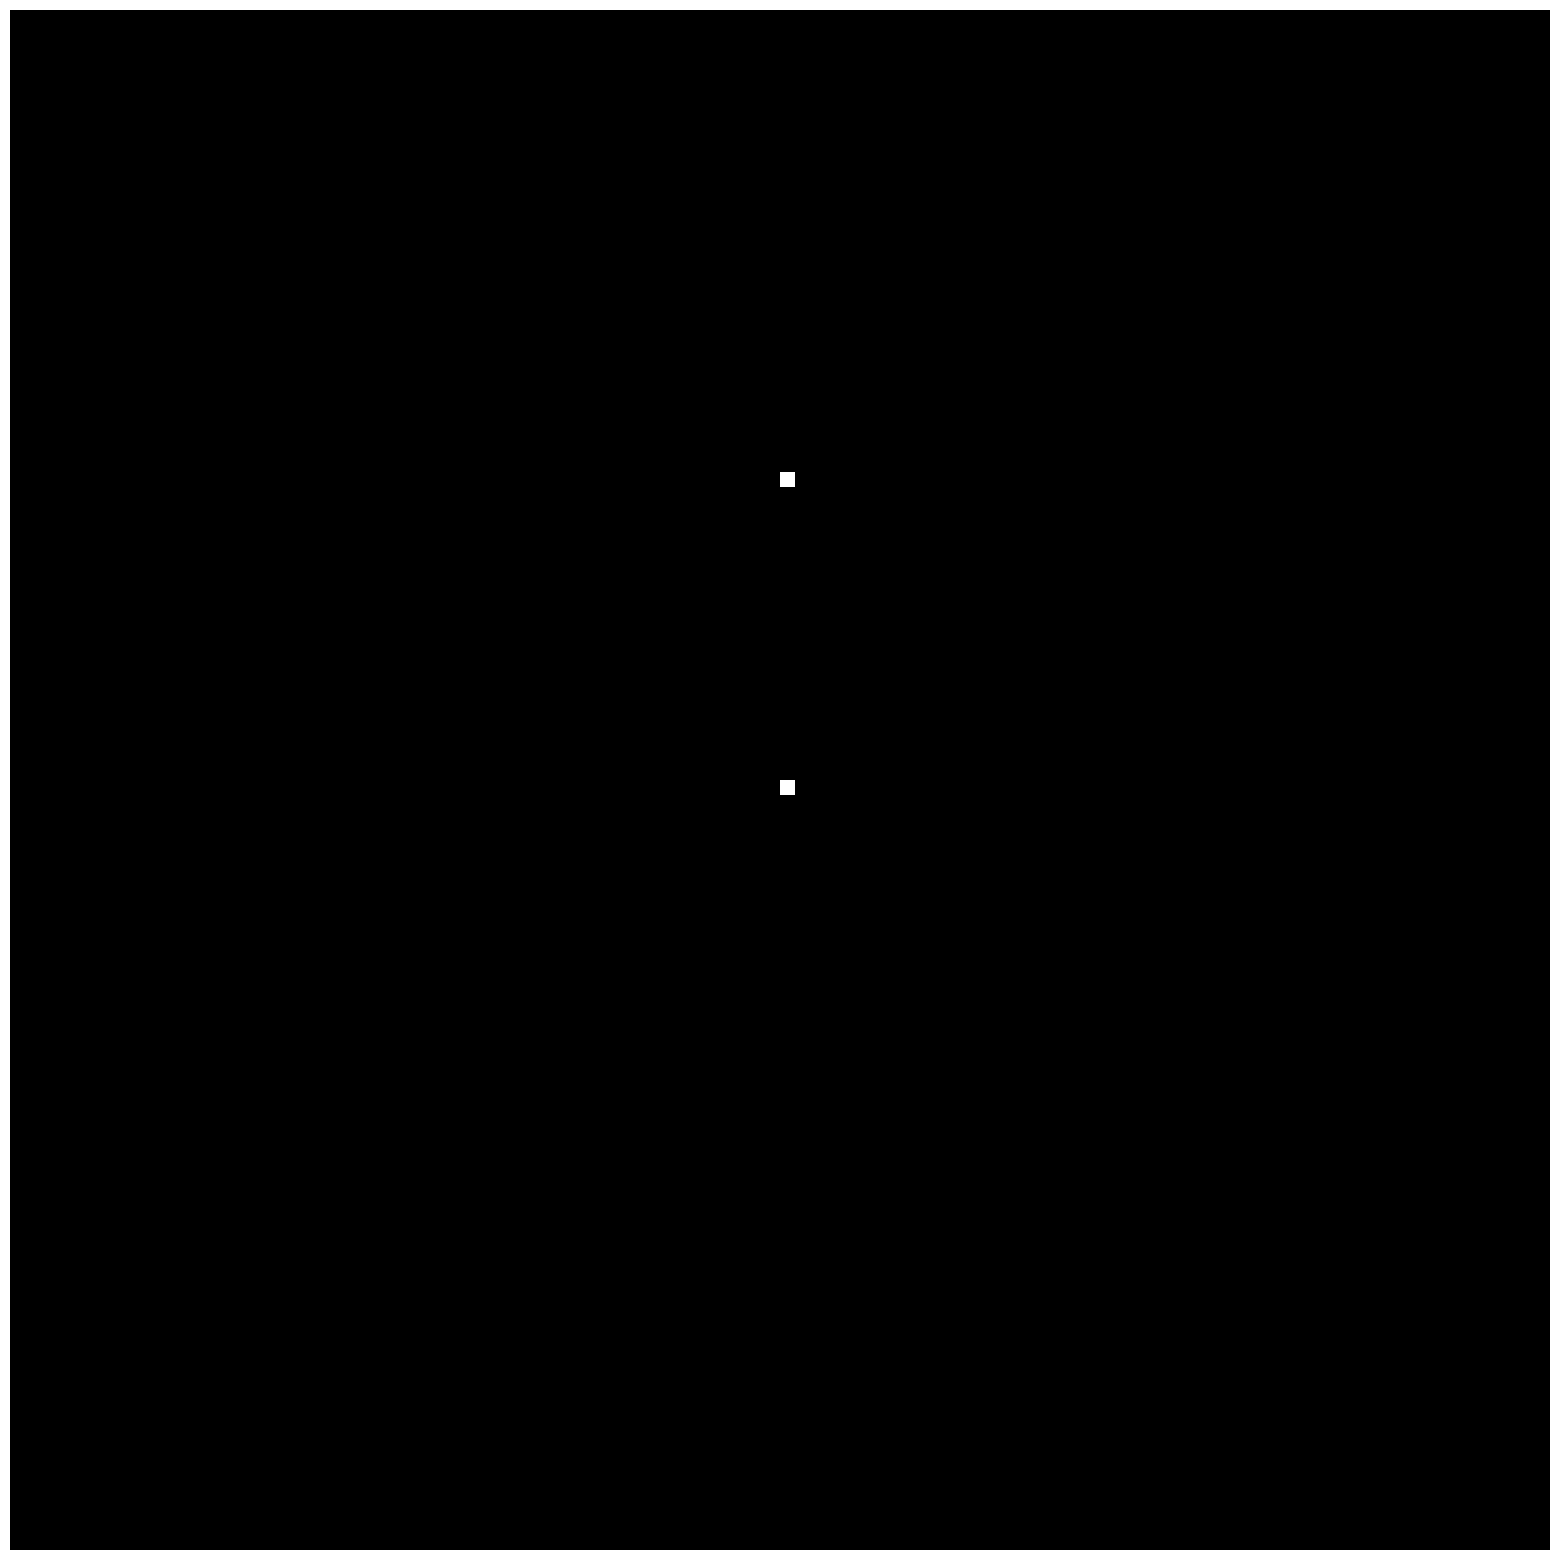

In [6]:
display_image(img)

In [7]:
#most effecient
def CubicBezierCurveCoefficients(P0, P1, P2, P3, t):
    Px = P0[0] + \
        (-3*P0[0] + 3*P1[0]) * t + \
        (3*P0[0] - 6*P1[0] + 3*P2[0]) * t**2 + \
        (-P0[0] + 3*P1[0] - 3*P2[0] + P3[0]) * t**3

    Py = P0[1] + \
        (-3*P0[1] + 3*P1[1]) * t + \
        (3*P0[1] - 6*P1[1] + 3*P2[1]) * t**2 + \
        (-P0[1] + 3*P1[1] - 3*P2[1] + P3[1]) * t**3
    
    return (int(Px), int(Py))

In [8]:
def GetAmountPointsBetweenFourPoints(P0, P1, P2, P3):
     return abs(P0[0] - P1[0]) + abs(P0[1] - P1[1]) + \
            abs(P1[0] - P2[0]) + abs(P1[1] - P2[1]) + \
            abs(P2[0] - P3[0]) + abs(P2[1] - P3[1]) + \
            abs(P3[0] - P0[0]) + abs(P3[1] - P0[1]) #cover edge cases

In [21]:
def DrawCubicBezierCurveCoefficients(P0, P1, P2, P3, image):
    dist = GetAmountPointsBetweenFourPoints(P0, P1, P2, P3)
    for t in range(dist):
        y, x = CubicBezierCurveCoefficients(P0, P1, P2, P3, t/dist)
        if (y >= 0) and (x >= 0) and (y < image.shape[0]) and (x < image.shape[0]):
            image[CubicBezierCurveCoefficients(P0, P1, P2, P3, t/dist)] = [1.0, 1.0, 1.0]

In [179]:
img = np.zeros((200, 200, 3))
centre = (int(img.shape[0]*0.5), int(img.shape[1]*0.5))

In [180]:
#values = np.array([[[6, 45], [0, 3], [4, 4], [4, 0]], [[6, 35], [0, 5], [2, 3], [3, 0]], [[3, 35], [0, 5], [2, 3], [3, 0]], [[3, 0], [0, 0], [0, 0], [0, 0]]])
values = np.array([[[2, 40], [2, 11], [2, 11], [0, 0]], 
                   [[2, 60], [2, 11], [2, 11], [4, 0]], 
                   [[2, 40], [2, 11], [2, 11], [4, 0]],
                   [[2, 60], [2, 11], [2, 11], [4, 0]],
                   [[2, 40], [2, 11], [2, 11], [4, 0]],
                   [[2, 60], [2, 11], [2, 11], [0, 0]], 
                   [[0, 0], [0, 0], [0, 0], [0, 0]]]) #offset rotation only fist value in first coord used

In [181]:
values

array([[[ 2, 40],
        [ 2, 11],
        [ 2, 11],
        [ 0,  0]],

       [[ 2, 60],
        [ 2, 11],
        [ 2, 11],
        [ 4,  0]],

       [[ 2, 40],
        [ 2, 11],
        [ 2, 11],
        [ 4,  0]],

       [[ 2, 60],
        [ 2, 11],
        [ 2, 11],
        [ 4,  0]],

       [[ 2, 40],
        [ 2, 11],
        [ 2, 11],
        [ 4,  0]],

       [[ 2, 60],
        [ 2, 11],
        [ 2, 11],
        [ 0,  0]],

       [[ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0]]])

In [182]:
values[:, 0, :]

array([[ 2, 40],
       [ 2, 60],
       [ 2, 40],
       [ 2, 60],
       [ 2, 40],
       [ 2, 60],
       [ 0,  0]])

In [183]:
def calculate_angles(points): #tree points x y
    main_ang_tot = np.sum(points[:, 0])
    #print(f"main angles: {main_ang_tot}")
    angles = points[:, 0] / main_ang_tot * 360
    final_angles = angles.copy()
    for i in range(len(angles)):
        for j in range(i):
            final_angles[i] += angles[j]

    #print(f"final angles {final_angles}")
    offsets = points[:, 1]
    return list(zip(final_angles, offsets))

In [184]:
def calculate_secondary_angles(points):
    secondary_points = []
    for point in points:
        secondary_points.append(calculate_angles(point))

    return secondary_points

In [185]:
import numpy as np

def DrawPoints(points, centre):

    main_points = calculate_angles(points[:, 0, :])
    #print(main_points)
    
    secondary_points = calculate_secondary_angles(points[:, 1 :, :])
    #print(secondary_points)

    all_points_positions = []
    
    #img[centre] = [1.0, 1.0, 1.0] #draw color
    
    for i in range(len(main_points) - 1): #calculate and array actual point positions
        points_positions = []
        main_point_pos = GetAngleOffset(centre, main_points[i][0], main_points[i][1])
        points_positions.append(main_point_pos)
        points_positions.append(GetAngleOffset(main_point_pos, secondary_points[i][0][0], secondary_points[i][0][1]))
        points_positions.append(GetAngleOffset(main_point_pos, secondary_points[i][1][0], secondary_points[i][1][1]))
        all_points_positions.append(points_positions)


        #main_point_pos = GetAngleOffset(centre, main_points[i][0], main_points[i][1])
        #img[main_point_pos] = [1.0, 0.0, 0.0] #draw color
        #img[GetAngleOffset(main_point_pos, secondary_points[i][0][0], secondary_points[i][0][1])] = [0.0, 1.0, 0.0] #draw color
        #img[GetAngleOffset(main_point_pos, secondary_points[i][1][0], secondary_points[i][1][1])] = [0.0, 0.0, 1.0] #draw color

    #print(all_points_positions)
    length = len(all_points_positions)
    for j in range(length):
        DrawCubicBezierCurveCoefficients(all_points_positions[j][0], all_points_positions[j][1],  all_points_positions[(j + 1)%length][2], all_points_positions[(j + 1)%length][0], img)

    return all_points_positions

In [186]:
point_positions = DrawPoints(values, centre)
point_positions

C:\Users\Admin\AppData\Local\Temp\ipykernel_11560\2363678848.py:4: RuntimeWarning: invalid value encountered in divide
  angles = points[:, 0] / main_ang_tot * 360


[[(120, 134), (109, 134), (131, 134)],
 [(70, 151), (70, 162), (59, 151)],
 [(60, 100), (60, 111), (49, 100)],
 [(69, 48), (69, 59), (58, 48)],
 [(120, 65), (120, 76), (109, 65)],
 [(160, 99), (149, 99), (171, 99)]]

In [187]:
white = [1.0, 1.0, 1.0]


def fill_from_center(centre, image):
    points = []
    points.append(centre)
    image[points[0]] = white
    
    while len(points) > 0:
        y = points[0][0]
        x = points[0][1]
        points.pop(0)
        if y > 0: #up
            if image[y - 1, x, 2] == 0: #up
                image[y - 1, x] = white
                points.append((y - 1, x))

        if x > 0:
            if image[y, x - 1, 2] == 0: #left
                image[y, x - 1] = white
                points.append((y, x - 1))

        if y < image.shape[0] - 1: #down
            if image[y + 1, x, 2] == 0:
                image[y + 1, x] = white
                points.append((y + 1, x))


        if x < image.shape[1] - 1:
            if image[y, x + 1, 2] == 0: #right
                image[y, x + 1] = white
                points.append((y, x + 1))


In [190]:
fill_from_center(centre, img)

In [191]:
centre

(100, 100)

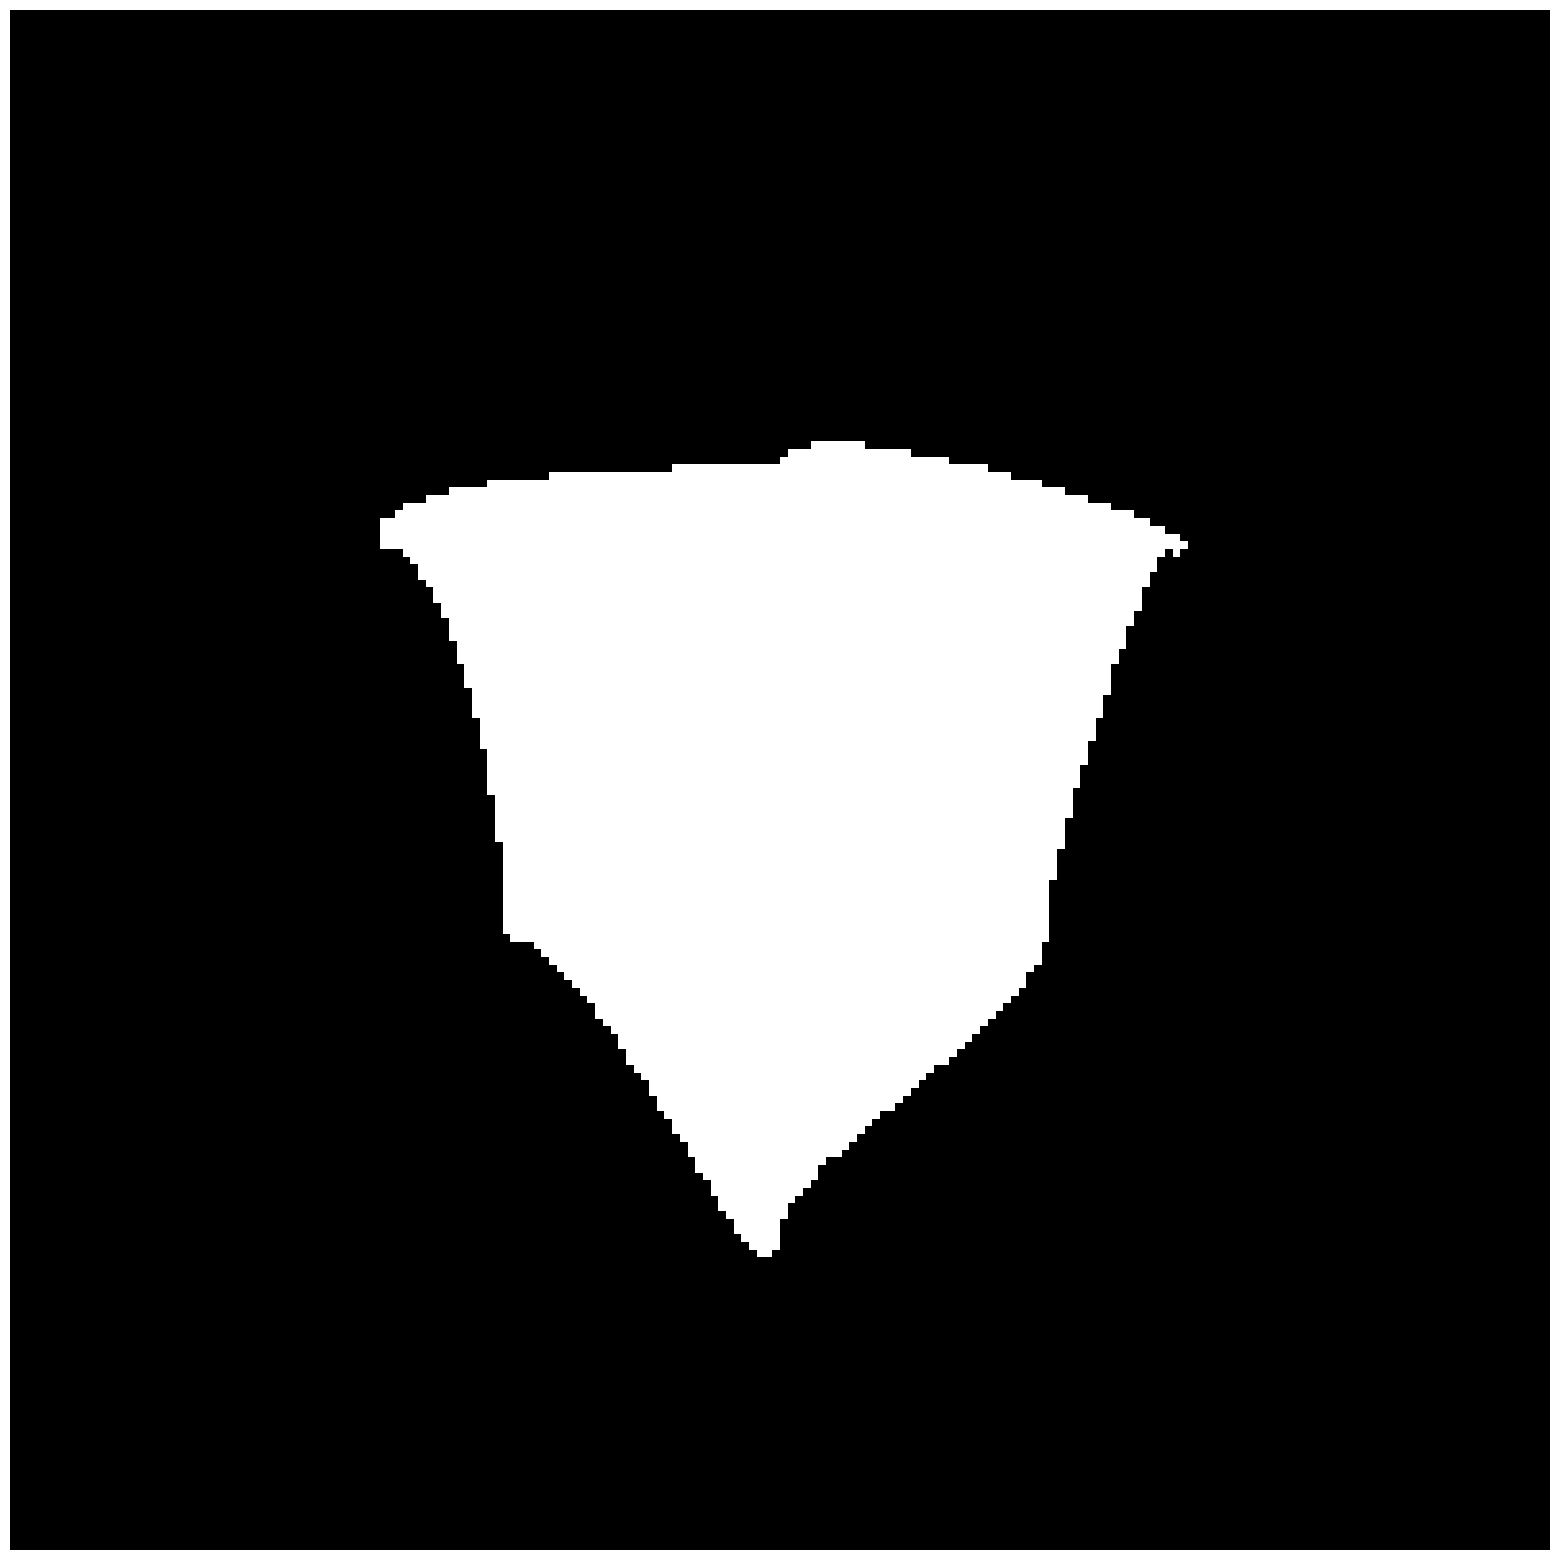

In [192]:
display_image(img)